In [2]:
#-*- coding=utf-8 -*-
import pdfplumber
import os
import pandas as pd
import re
file_dir = r'D:\qq_doc\2019'
file_list = []
basic_data = []
fin_data = []
for files in os.walk(file_dir):
    # print(files[2])
    for file in files[2]:
        if os.path.splitext(file)[1] == '.PDF' or os.path.splitext(file)[1] == '.pdf':
            file_list.append(file_dir + '\\' + file)
# print(file_list)
def regularExpression(key,text):
    p = re.compile(r'(?<=%s)\s*[^\n]+' %key)
    info = p.findall(text)[0].strip()
    return info
def get_basic(text):
    fr = regularExpression('公司的法定代表人',text)
    dz = regularExpression('办公地址',text)
    wz = regularExpression('公司国际互联网网址',text)
    xx = regularExpression('电子信箱',text)
    jc = re.compile('股票简称(.*?)股票代码').findall(text)[0].strip()
    dm = regularExpression('股票代码',text)
    basic_info = {  
                    '电子信箱': xx,
                    '公司国际互联网网址': wz,
                    '办公地址': dz,
                    '公司的法定代表人': fr,
                    '股票代码': dm,
                    '股票简称': jc,
                    
                    }
    return basic_info

def get_exInfo(text):
    p = re.compile('\d+(?:,\d{3})*(?:\.\d+)?(?:%)?')
    numbers = p.findall(text)

    return numbers
# print('提取文件完成,开始分析PDF')
for i in range(0,17):
#     print("第",i+1,"个PDF加载中")
    pdf = pdfplumber.open(file_list[i])
    pages = pdf.pages
    frist_info = 1
    for item in pages:
        # print(1)
        text = item.extract_text()
        if not text is None:
            if "公司信息" in text and frist_info:
                b_text = text
                frist_info = 0
            if '主要会计数据和财务指标' in text:
                 s_text = text
                 break
    # s_text = s_info.extract_text()
    b_start_index=b_text.find('一、公司信息')
    b_end_index=b_text.find('二、联系人和联系方式')
    b_text = b_text[b_start_index:b_end_index]
    s_start_index=s_text.find('归属于上市公司股东的扣除')
    s_end_index=s_text.find('经营活动产生的现金流量净额')
    s_text = s_text[s_start_index:s_end_index]
    # print(b_text)
    b = get_basic(b_text)
    basic_data.append(b)
    # print(s_text)
    s = get_exInfo(s_text)
    f = {}
    f['2019'] = s[0]
    f['2018'] = s[1]
    f['2017'] = s[3]
    f['股票代码'] = b['股票代码']
    f['股票简称'] = b['股票简称']
    fin_data.append(f)
    pdf.close()
#     print("完成")




In [5]:
from IPython.display import display, HTML
from pandas import DataFrame
order = ['股票简称', '股票代码', '公司的法定代表人', '办公地址', '公司国际互联网网址', '电子信箱']
df = DataFrame(basic_data)
df = df[order]
display(HTML(df.to_html()))

In [6]:
order = ['股票简称','股票代码','2019','2018','2017']
df1 = DataFrame(fin_data)
df1 = df1[order]
display(HTML(df1.to_html()))

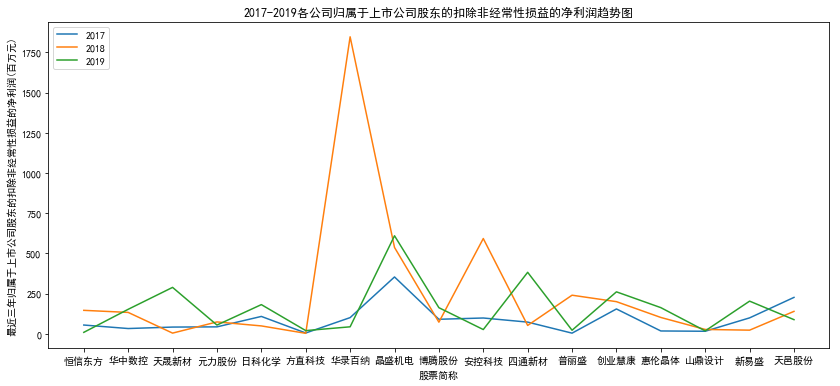

In [22]:
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.rcParams['font.sans-serif']=['Microsoft YaHei']
plt.rcParams['font.sans-serif']=['simhei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示中文标签
plt.figure(figsize=(14,6))
x = df1['股票简称']
y = df1['2019']
y1 = df1['2018']
y2 = df1['2017']
# print(y)
# for i in range(len(y2)):
#      y2[i] = float(y2[i].replace(',', ''))/1000000
plt.plot(x, y2, label='2017')
plt.plot(x, y1, label='2018')
plt.plot(x, y, label='2019')
# print(y)
# print(x)
plt.xlabel("股票简称")
plt.ylabel("最近三年归属于上市公司股东的扣除非经常性损益的净利润(百万元)")
plt.title("2017-2019各公司归属于上市公司股东的扣除非经常性损益的净利润趋势图")
plt.legend(loc="upper left")

plt.show()

In [ ]:
分析与解读：①大部分企业2019年净利润比2017年高，经营状况有所提高。②其中华录百纳在2018年的净利润是2017年的18倍左右，是2019年42倍左右。